# Hopfield Model

## QUESTION 1 - A 100 cell neural network based on hopfield model.

Investigate the capacity of the model in the case of random pattern. 

In [1]:
# import some stuff
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm import tqdm
import seaborn as sns
sns.set_palette('hls', 10)
import scipy
import gzip

In [2]:
# import image function
def image_to_np(path):
    im = Image.open(path)
    im_np = np.asarray(im)
    try:
        im_np = im_np[:, :, 0]
    except IndexError:
        pass
    im_np = np.where(im_np<128, -1, 1)
    im_np = im_np.reshape(N)
    return im_np

In [3]:
def create_random_patterns(nb_patterns):
    
    X = np.asarray([np.random.choice([1, -1], size=N)])
    
    for i in range(nb_patterns-1):
        X = np.append(X, [np.random.choice([1, -1], size=N)], axis=0)
        
    return X

In [4]:
def weights(nb_patterns, X):
    
    w = np.zeros((N, N))
    for i in tqdm(range(N)):
        
        for j in range(N):
            
            for p in range(nb_patterns):
                w[i, j] += (X[p, i]*X[p, j]).sum()
            if i==j:
                w[i, j] = 0
                
    w /= N
    
    return w

In [5]:
def recover(nb_patterns, NO_OF_ITERATIONS, test_array, w, X):
    
    h = np.zeros((N))
    fig = plt.figure(figsize = (8, 8))
    hamming_distance = np.zeros((NO_OF_ITERATIONS, nb_patterns))
    
    for iteration in tqdm(range(NO_OF_ITERATIONS)):
        for i in range(N):
            
            h[i] = 0
            for j in range(N):
                h[i] += w[i, j]*test_array[j]
                
        test_array = np.where(h<0, -1, 1)
        
        for i in range(nb_patterns):
            hamming_distance[iteration, i] = ((X - test_array)[i]!=0).sum()
        plt.subplot(10, 10,iteration+1)
        plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')
        
    print('Pattern converged to: ', np.argmin(hamming_distance[NO_OF_ITERATIONS-1]) + 1)
    
    return h, hamming_distance, test_array

In [6]:
def capacity(random_pattern, h):
    
    x = -test_array*(test_array-h)
    C= x.sum()
    
    return C

In [7]:
def corrupted_pattern(nb_patterns, X, NO_OF_BITS_TO_CHANGE):
    
    random_pattern = np.random.randint(nb_patterns)
    test_array = X[random_pattern]
    random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
    test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test
    
    return random_pattern, test_array

### What is the dependency of capacity in the number of patterns stored in the model?

In [22]:
# define parameters, 100 cells network
nb_patterns_array1 = [4, 8, 10, 15, 20, 30, 40, 80, 100, 150]
pattern_width = 10
pattern_height = 10
NO_OF_ITERATIONS = 25
N = pattern_width*pattern_height
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_BITS_TO_CHANGE = int(N/3)

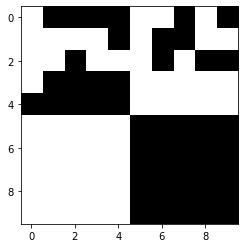

In [23]:
# corrupt a pattern to be recoverd
Y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
Y[:NO_OF_BITS_TO_CHANGE] = random_pattern_test
test_array_copy = Y
plt.imshow(np.where(Y.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

In [24]:
random_patterns = create_random_patterns(150)

Number of patterns:  4


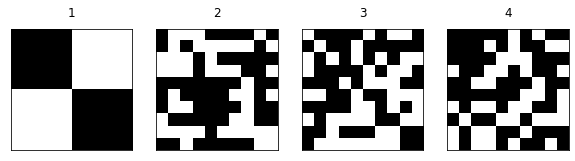

  0%|          | 0/100 [00:00<?, ?it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 30.06it/s]


Pattern converged to:  1


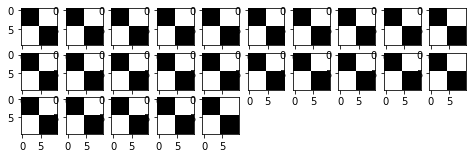

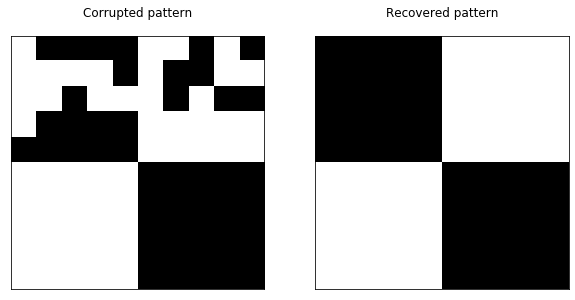

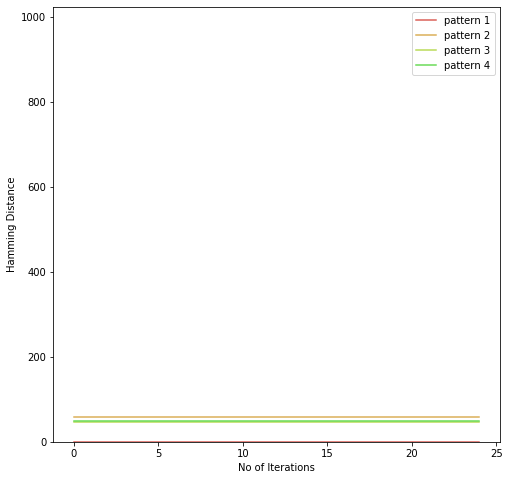

Number of patterns:  8


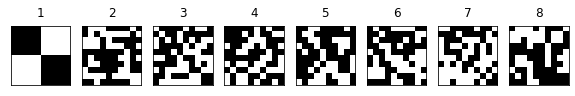

 26%|██▌       | 26/100 [00:00<00:00, 251.86it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 39.52it/s]


Pattern converged to:  1


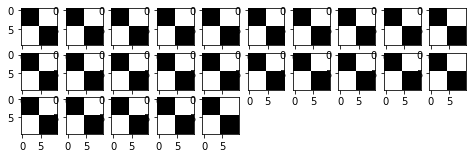

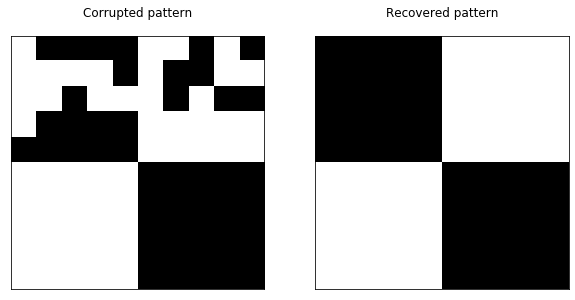

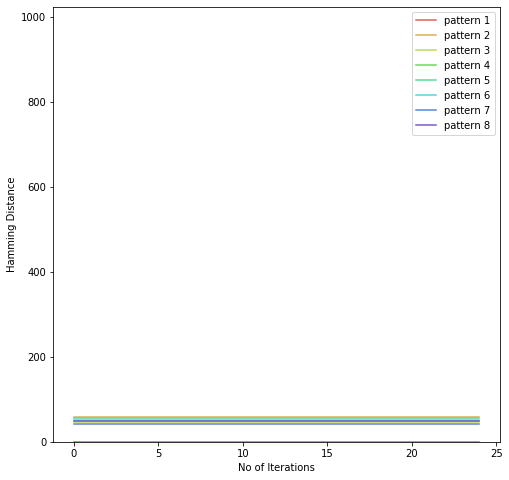

Number of patterns:  10


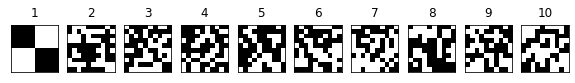

 21%|██        | 21/100 [00:00<00:00, 204.10it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 47.24it/s]


Pattern converged to:  1


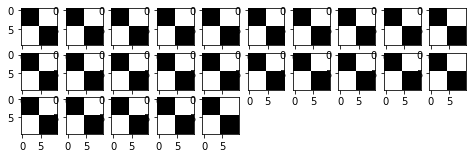

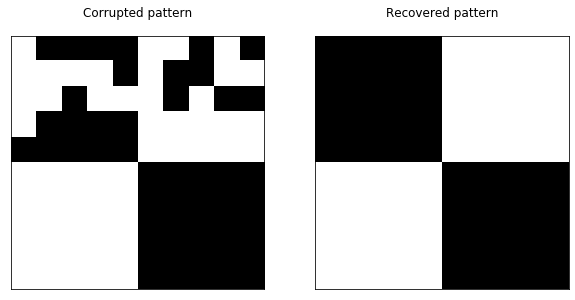

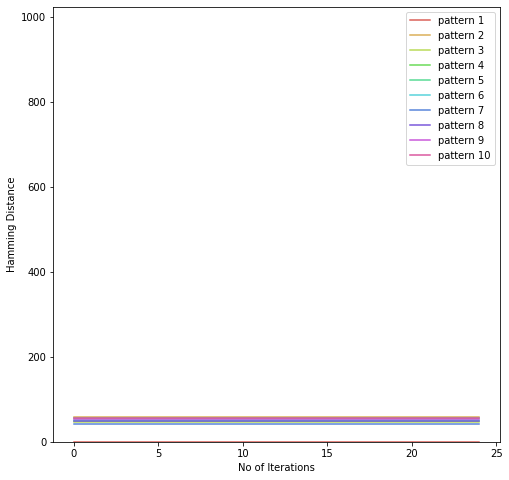

Number of patterns:  15


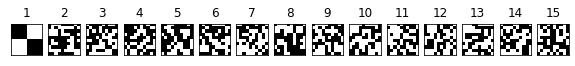

 15%|█▌        | 15/100 [00:00<00:00, 142.99it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 42.06it/s]


Pattern converged to:  1


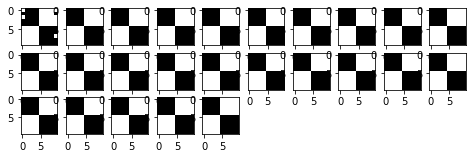

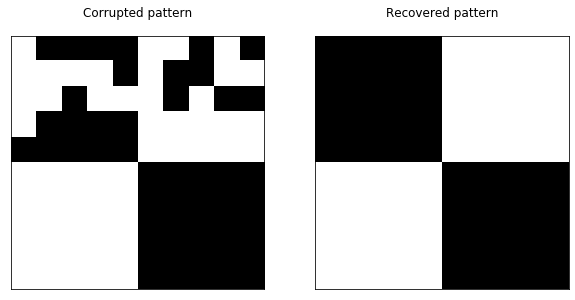

Number of patterns:  20


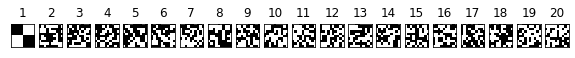

 12%|█▏        | 12/100 [00:00<00:00, 113.79it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 41.90it/s]


Pattern converged to:  1


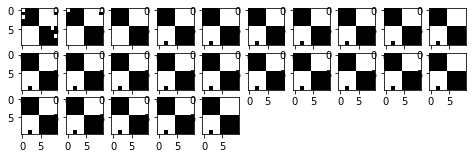

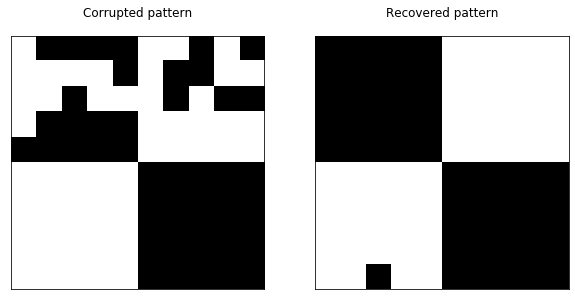

Number of patterns:  30


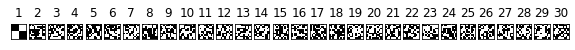

  4%|▍         | 4/100 [00:00<00:02, 39.90it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 40.49it/s]


Pattern converged to:  1


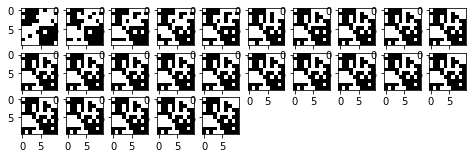

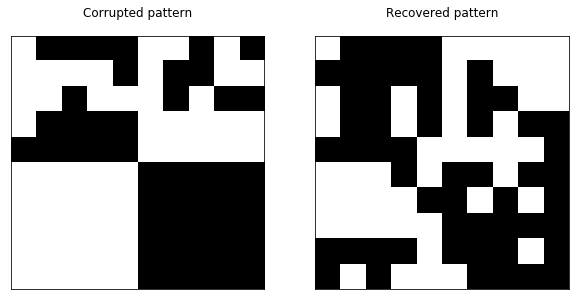

Number of patterns:  40


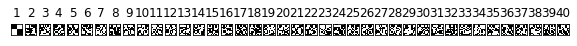

  5%|▌         | 5/100 [00:00<00:02, 46.64it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 30.78it/s]


Pattern converged to:  40


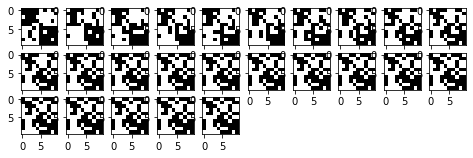

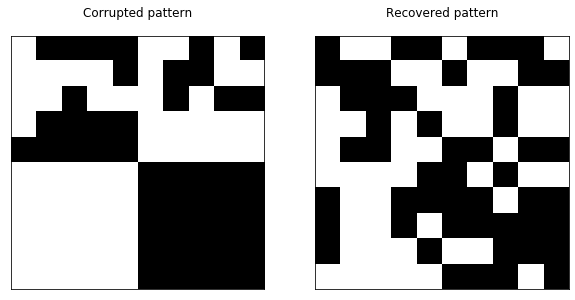

Number of patterns:  80


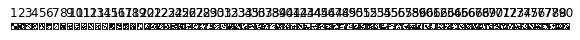

  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 33.60it/s]


Pattern converged to:  8


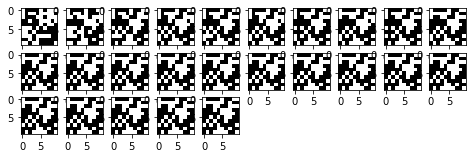

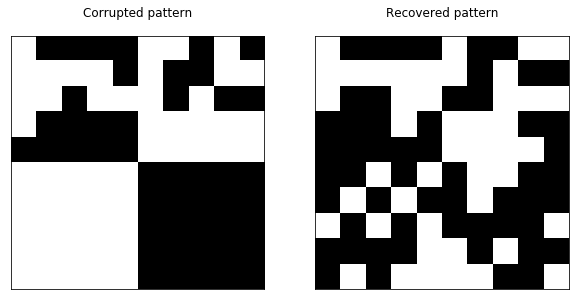

Number of patterns:  100


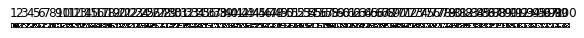

  2%|▏         | 2/100 [00:00<00:06, 16.07it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 37.80it/s]


Pattern converged to:  19


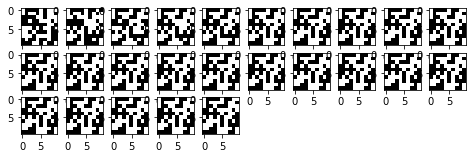

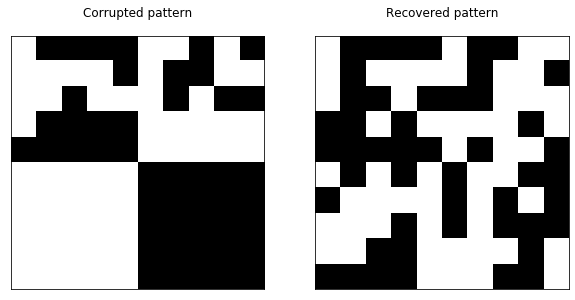

Number of patterns:  150


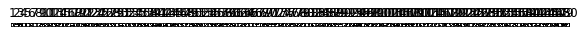

  2%|▏         | 2/100 [00:00<00:07, 12.36it/s]

Pattern should converge to:  1


100%|██████████| 25/25 [00:00<00:00, 34.57it/s]


Pattern converged to:  104


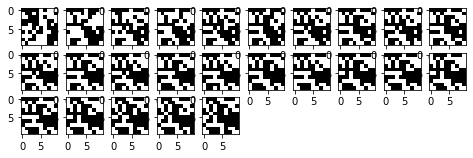

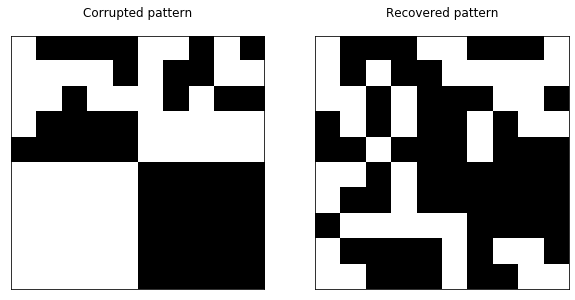

In [25]:
hamming = []
variance = []
for nb_patterns in range(len(nb_patterns_array1)):
    
    nb_patterns = nb_patterns_array1[nb_patterns]
    print('Number of patterns: ', nb_patterns)
    
    #  create random patterns
    X = random_patterns[:nb_patterns]
    X[0] = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
    Z = X.copy()
    
    
    
    # the patterns to be learnd
    fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

    count = 0
    for i in range(nb_patterns):
        i == count
        ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(str(i+1))
        count += 1
    
    plt.show()
    
    
    
    # corrupt a pattern to be recoverd
    random_pattern = 0
    test_array = Y
    print('Pattern should converge to: ', random_pattern+1)

    
    
    # calculating the weights matrix    
    w = weights(nb_patterns, X)
    
    
    #recover images
    h, hamming_distance, test_array = recover(nb_patterns, NO_OF_ITERATIONS, test_array, w, X)
    converged_pattern = np.argmin(hamming_distance[NO_OF_ITERATIONS-1])
    hamming.append(hamming_distance[NO_OF_ITERATIONS-1][0])
    variance.append(np.sqrt(nb_patterns/N))
    
    
    #show recovery results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].matshow(test_array_copy.reshape(pattern_height, pattern_width), cmap='gray')
    ax[0].set_title('Corrupted pattern')
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].matshow(test_array.reshape(pattern_height, pattern_width), cmap='gray')
    ax[1].set_title('Recovered pattern')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    plt.show()
    
    if nb_patterns <= 10:
        fig = plt.figure(figsize = (8, 8))
        plt.plot(hamming_distance)
        plt.xlabel('No of Iterations')
        plt.ylabel('Hamming Distance')
        plt.ylim([0, 1024])
        plt.legend(['pattern 1', 'pattern 2', 'pattern 3', 'pattern 4', 'pattern 5', 'pattern 6', 'pattern 7', 'pattern 8', 'pattern 9', 'pattern 10'],  loc='best')
        plt.show()
    else:
        continue

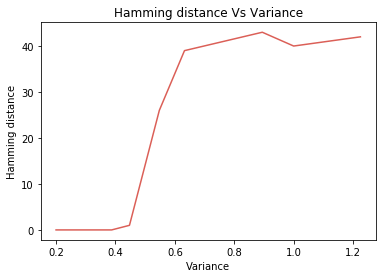

In [29]:
plt.title('Hamming distance Vs Variance')
plt.ylabel('Hamming distance')
plt.xlabel('Variance')
plt.plot(variance, hamming)

### How many iterations needed for the model to recover a given pattern?

In [110]:
nb_patterns = 15
pattern_width = 10
pattern_height = 10
NO_OF_ITERATIONS = 10
N = pattern_width*pattern_height
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_BITS_TO_CHANGE = int(N/2)

In [111]:
# import 4 imaes
Z = np.zeros((nb_patterns, pattern_width * pattern_height))

Z[0] = [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1]
Z[1] = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Z[2] = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
Z[3] = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

f = create_random_patterns(nb_patterns-4)

for i in range(len(f)):
    Z[i+4] = f[i]

In [112]:
Z_copy = Z.copy()

#### lets start with 4 patterns:

In [113]:
nb_patterns = 4

In [114]:
X = Z[:nb_patterns]

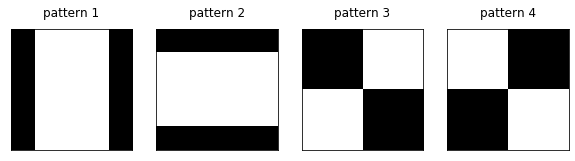

In [115]:
# the patterns to be learnd
fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

count = 0
for i in range(nb_patterns):
    i == count
    ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('pattern ' + str(i+1))
    count += 1
    
plt.show()

In [116]:
# calculating the weights matrix
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(nb_patterns):
            w[i, j] += (X[p, i]*X[p, j]).sum()
        if i==j:
            w[i, j] = 0
w /= N

100%|██████████| 100/100 [00:00<00:00, 466.57it/s]


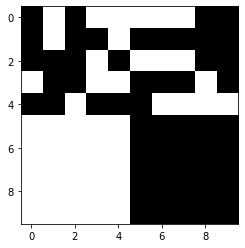

In [117]:
# creating a corrupted version of a pattern by random numbers
test_array = X[2]
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

In [118]:
test_array_copy = test_array.copy()

100%|██████████| 10/10 [00:02<00:00,  3.14it/s]


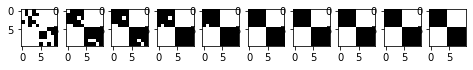

In [119]:
fig = plt.figure(figsize = (8, 8))
hamming_distance = np.zeros((NO_OF_ITERATIONS, nb_patterns))
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)
#     print(test_array.shape)
    for i in range(nb_patterns):
#         print(iteration)
        hamming_distance[iteration, i] = ((X - test_array)[i]!=0).sum()
    plt.subplot(10, 10,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

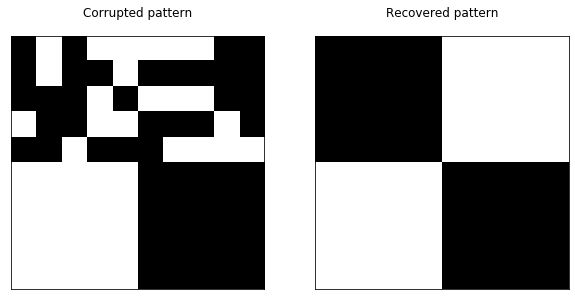

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].matshow(test_array_copy.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Corrupted pattern')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(test_array.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Recovered pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.savefig('recovered for question of iterations')
plt.show()

#### now, lets take 15 patterns:

In [93]:
nb_patterns = 15

In [94]:
X = Z_copy[:nb_patterns]

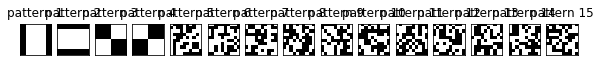

In [95]:
# the patterns to be learnd
fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

count = 0
for i in range(nb_patterns):
    i == count
    ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('pattern ' + str(i+1))
    count += 1
    
plt.show()

In [96]:
# calculating the weights matrix
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(nb_patterns):
            w[i, j] += (X[p, i]*X[p, j]).sum()
        if i==j:
            w[i, j] = 0
w /= N

100%|██████████| 100/100 [00:00<00:00, 143.45it/s]


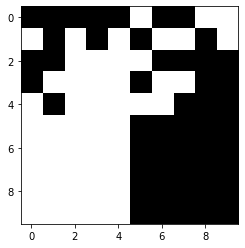

In [97]:
# creating a corrupted version of a pattern by random numbers
#random_pattern = np.random.randint(nb_patterns)
#test_array = X[random_pattern]
#random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
#test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

plt.imshow(test_array_copy.reshape(N_sqrt, N_sqrt), cmap='gray')
test = test_array_copy.copy()

100%|██████████| 10/10 [00:00<00:00, 35.99it/s]


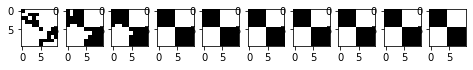

In [98]:
fig = plt.figure(figsize = (8, 8))
hamming_distance = np.zeros((NO_OF_ITERATIONS, nb_patterns))
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array_copy[j]
    test_array_copy = np.where(h<0, -1, 1)
    for i in range(nb_patterns):
        hamming_distance[iteration, i] = ((X - test_array_copy)[i]!=0).sum()
    plt.subplot(10, 10,iteration+1)
    plt.imshow(np.where(test_array_copy.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

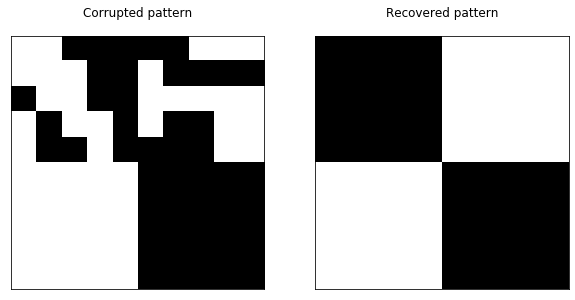

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].matshow(test.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Corrupted pattern')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(test_array.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Recovered pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

as we can see, the model recoverd the pattern after more iterations then when we used 4 patterns.

### What is the dependency of the memory in the amount of noise added to the pattern?

In [168]:
nb_patterns = 4
pattern_width = 10
pattern_height = 10
NO_OF_ITERATIONS = 25
N = pattern_width*pattern_height
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_BITS_TO_CHANGE_ARRAY = [10, 30, 50, 70, 100]

In [169]:
# import 4 imaes
Z = np.zeros((nb_patterns, pattern_width * pattern_height))

Z[0] = [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1]
Z[1] = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Z[2] = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
Z[3] = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1]


In [170]:
Z_copy = Z.copy()

In [171]:
X = Z[:nb_patterns].copy()

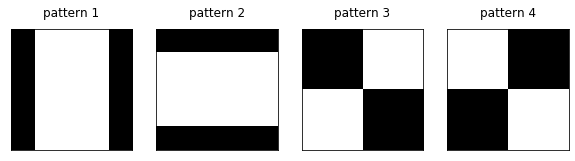

In [172]:
# the patterns to be learnd
fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

count = 0
for i in range(nb_patterns):
    i == count
    ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('pattern ' + str(i+1))
    count += 1
    
plt.show()

 35%|███▌      | 35/100 [00:00<00:00, 338.59it/s]

number of bits to change:  10


 36%|███▌      | 36/100 [00:00<00:00, 352.25it/s]

number of bits to change:  30


 38%|███▊      | 38/100 [00:00<00:00, 378.97it/s]

number of bits to change:  50


 31%|███       | 31/100 [00:00<00:00, 305.15it/s]

number of bits to change:  70


 30%|███       | 30/100 [00:00<00:00, 298.67it/s]

number of bits to change:  100


100%|██████████| 25/25 [00:00<00:00, 31.14it/s]


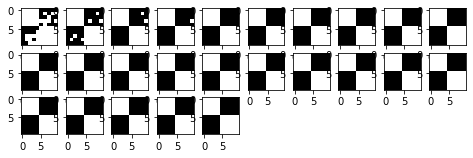

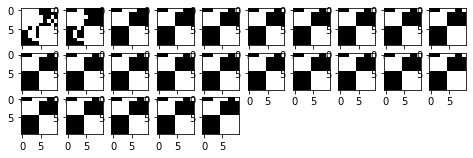

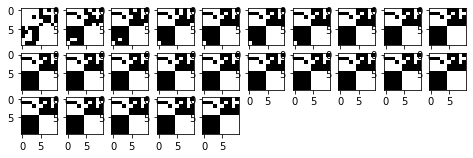

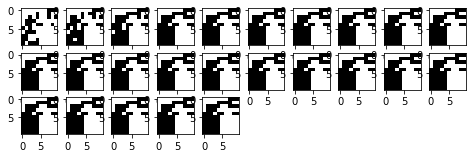

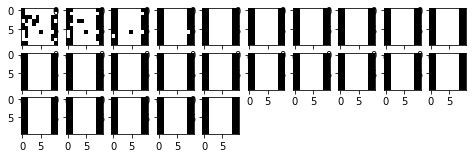

In [173]:
for i in range(len(NO_OF_BITS_TO_CHANGE_ARRAY)):
    NO_OF_BITS_TO_CHANGE = NO_OF_BITS_TO_CHANGE_ARRAY[i]
    print('number of bits to change: ', NO_OF_BITS_TO_CHANGE)
    
    # calculating the weights matrix
    w = np.zeros((N, N))
    h = np.zeros((N))
    for i in tqdm(range(N)):
        for j in range(N):
            for p in range(nb_patterns):
                w[i, j] += (X[p, i]*X[p, j]).sum()
            if i==j:
                w[i, j] = 0
    w /= N
    
    # creating a corrupted version of a pattern by random numbers
    test_array = X[3]
    random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
    test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

    
    test_array_copy = test_array.copy()
    
    fig = plt.figure(figsize = (8, 8))
    hamming_distance = np.zeros((NO_OF_ITERATIONS, nb_patterns))
    for iteration in tqdm(range(NO_OF_ITERATIONS)):
        for i in range(N):
            i = np.random.randint(N)
            h[i] = 0
            for j in range(N):
                h[i] += w[i, j]*test_array[j]
        test_array = np.where(h<0, -1, 1)
#     print(test_array.shape)
        for i in range(nb_patterns):
#         print(iteration)
            hamming_distance[iteration, i] = ((X - test_array)[i]!=0).sum()
        
        plt.subplot(10, 10,iteration+1)
        plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

as we can see, increasing the noise influence the memory of the model.

### Is there an importance of the distortion of the initial pattern in the time of convergence?

In [8]:
# define parameters, 100 cells network
nb_patterns = 10
pattern_width = 10
pattern_height = 10
NO_OF_ITERATIONS = 25
N = pattern_width*pattern_height
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_BITS_TO_CHANGE = int(70)

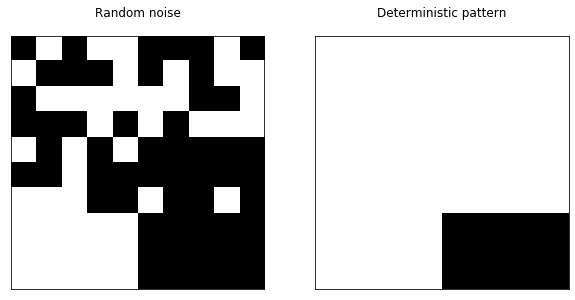

In [9]:
# corrupt a pattern to be recoverd
Y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
Y2 = Y.copy()
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
random_pattern_test2 = np.random.choice([1], size=NO_OF_BITS_TO_CHANGE)
Y[:NO_OF_BITS_TO_CHANGE] = random_pattern_test
Y2[:NO_OF_BITS_TO_CHANGE] = random_pattern_test2
test_array_copy = Y
test_array_copy2 = Y2

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].matshow(Y.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Random noise')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(Y2.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Deterministic pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

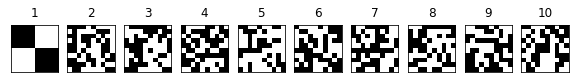

  8%|▊         | 8/100 [00:00<00:01, 75.48it/s]

Pattern should converge to:  1


 12%|█▏        | 3/25 [00:00<00:00, 28.37it/s]

Pattern converged to:  1


100%|██████████| 25/25 [00:01<00:00, 25.36it/s]


Pattern converged to:  5


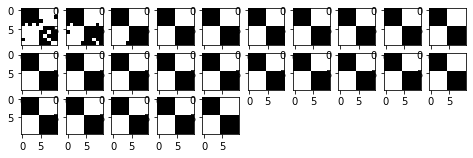

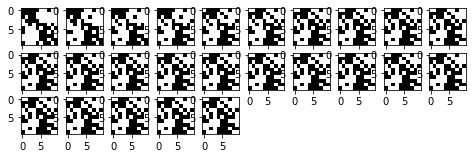

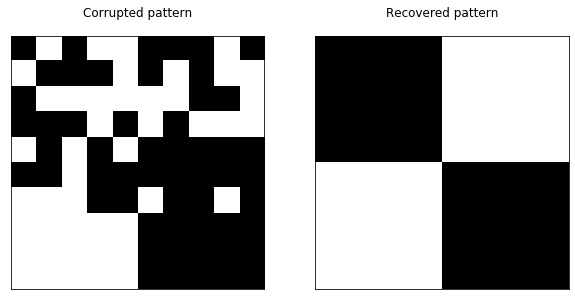

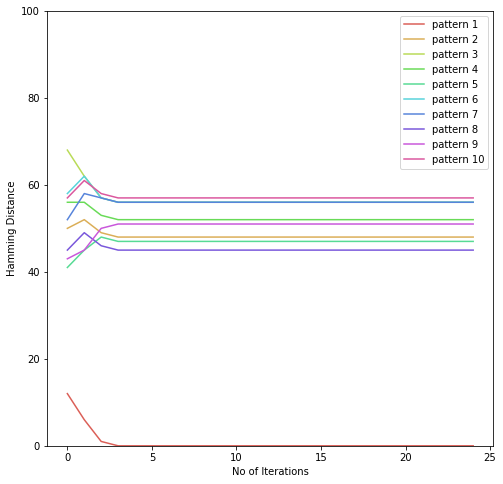

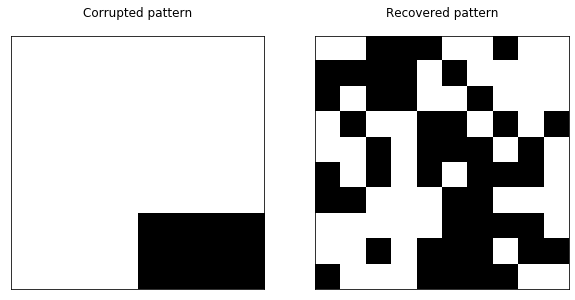

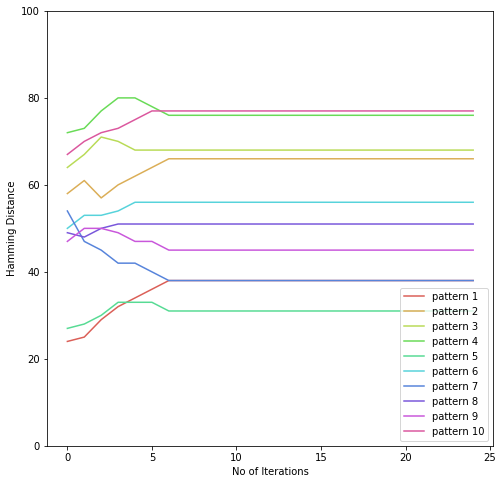

In [10]:
random_patterns = create_random_patterns(nb_patterns)


#  create random patterns
X = random_patterns[:nb_patterns]
X[0] = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
Z = X.copy()
    
    
    
# the patterns to be learnd
fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

count = 0
for i in range(nb_patterns):
    i == count
    ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(str(i+1))
    count += 1
    
plt.show()
    
    
    
# corrupt a pattern to be recoverd
random_pattern = 0
test_array = Y
test_array2 = Y2
print('Pattern should converge to: ', random_pattern+1)

    
    
# calculating the weights matrix    
w = weights(nb_patterns, X)
    
    
#recover images
h, hamming_distance, test_array = recover(nb_patterns, NO_OF_ITERATIONS, test_array, w, X)
h2, hamming_distance2, test_array2 = recover(nb_patterns, NO_OF_ITERATIONS, test_array2, w, X)
    
    
#show recovery results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].matshow(test_array_copy.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Corrupted pattern')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(test_array.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Recovered pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])
    
plt.show()
    

fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 100])
plt.legend(['pattern 1', 'pattern 2', 'pattern 3', 'pattern 4', 'pattern 5', 'pattern 6', 'pattern 7', 'pattern 8', 'pattern 9', 'pattern 10'],  loc='best')

plt.show()

        
        
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].matshow(test_array_copy2.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Corrupted pattern')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(test_array2.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Recovered pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()
    
fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance2)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 100])
plt.legend(['pattern 1', 'pattern 2', 'pattern 3', 'pattern 4', 'pattern 5', 'pattern 6', 'pattern 7', 'pattern 8', 'pattern 9', 'pattern 10'],  loc='best')

plt.show()


## QUESTION 2

In [18]:
# define parameters, 100 cells network
nb_patterns_array = [4, 7, 10, 15, 20]
pattern_width = 28
pattern_height = 28
NO_OF_ITERATIONS = 25
N = pattern_width*pattern_height
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_BITS_TO_CHANGE = int(N/4)

In [19]:
f = gzip.open('/home/noamtal/Desktop/BGU/4th_year/semsterB/IntroToNeuralNetworks/HopefieldAssignment/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 100

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

In [20]:
data_black = np.zeros((num_images, image_size, image_size, 1))
for i in range(len(data)):
    
    a = np.zeros(image_size*image_size)
    x = np.reshape(data[i], image_size*image_size)
    
    for j in range(len(x)):
        
        a[j] = np.where(x[j] > 0 , -1, 1)
        
    A = np.reshape(a, (image_size, image_size, 1))
    data_black[i] = A
        

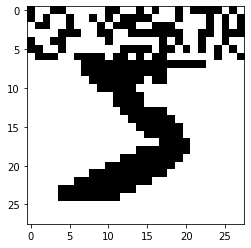

In [21]:
# corrupt a pattern to be recoverd
random_pattern = 0
Y = np.reshape(data_black[random_pattern], N).copy()
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
Y[:NO_OF_BITS_TO_CHANGE] = random_pattern_test
test_array_copy = Y
plt.imshow(np.where(Y.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

Number of patterns:  4


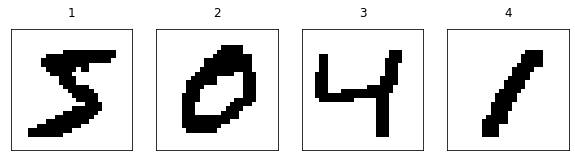

  0%|          | 0/784 [00:00<?, ?it/s]

Pattern should converge to: pattern  1


100%|██████████| 25/25 [00:17<00:00,  1.51it/s]


Pattern converged to:  1


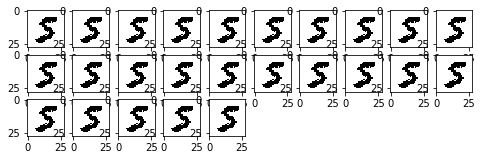

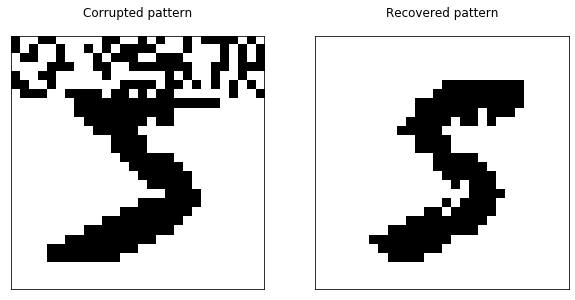

Number of patterns:  7


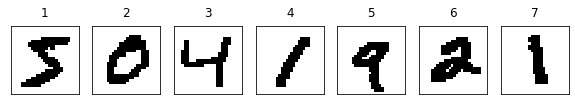

  1%|          | 4/784 [00:00<00:22, 34.38it/s]

Pattern should converge to: pattern  1


100%|██████████| 25/25 [00:17<00:00,  1.50it/s]


Pattern converged to:  4


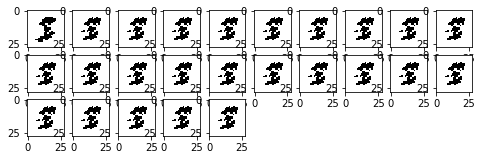

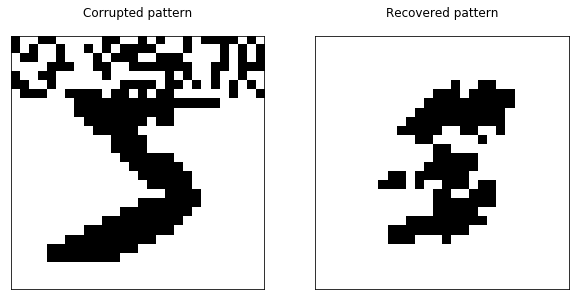

Number of patterns:  10


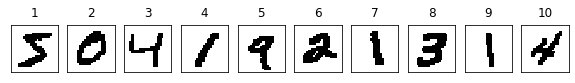

  0%|          | 2/784 [00:00<01:12, 10.72it/s]

Pattern should converge to: pattern  1


100%|██████████| 25/25 [00:16<00:00,  1.50it/s]


Pattern converged to:  9


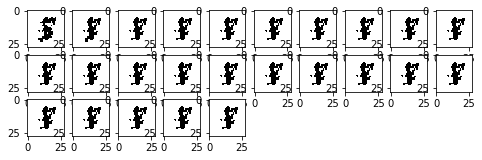

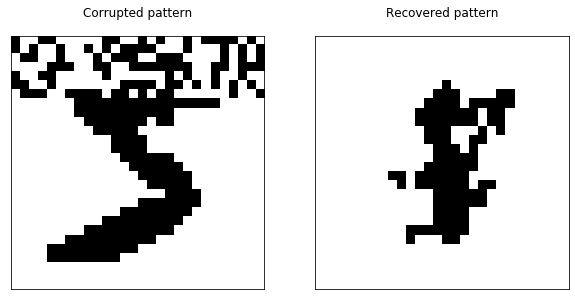

Number of patterns:  15


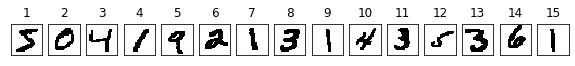

  0%|          | 2/784 [00:00<00:48, 16.28it/s]

Pattern should converge to: pattern  1


100%|██████████| 25/25 [00:17<00:00,  1.46it/s]


Pattern converged to:  9


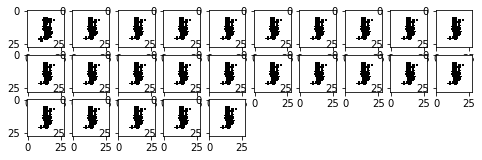

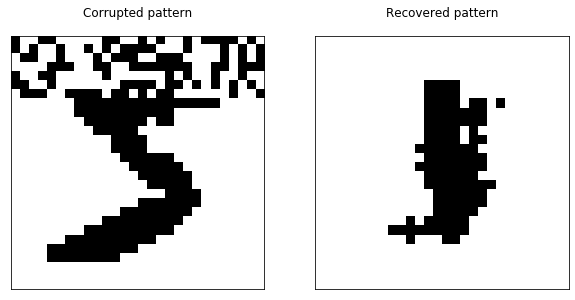

Number of patterns:  20


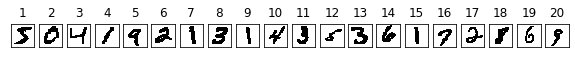

  0%|          | 2/784 [00:00<01:00, 12.84it/s]

Pattern should converge to: pattern  1


100%|██████████| 25/25 [00:16<00:00,  1.56it/s]


Pattern converged to:  20


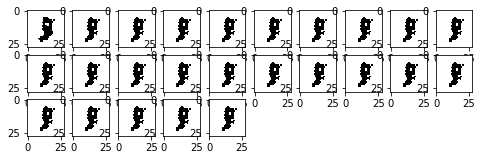

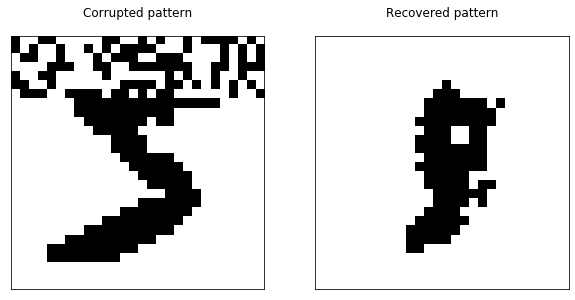

In [22]:
hamming = []
variance = []
for nb_patterns in range(len(nb_patterns_array)):
    
    nb_patterns = nb_patterns_array[nb_patterns]
    print('Number of patterns: ', nb_patterns)
    
    #  create random patterns
    X = data_black[:nb_patterns]
    X = np.reshape(X, (nb_patterns, pattern_width*pattern_height))
    
    
    # the patterns to be learnd
    fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

    count = 0
    for i in range(nb_patterns):
        i == count
        ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(str(i+1))
        count += 1

    plt.show()
    
    
    
    # corrupt a pattern to be recoverd
    test_array = Y
    print('Pattern should converge to: pattern ', random_pattern+1)

    
    
    # calculating the weights matrix    
    w = weights(nb_patterns, X)
    
    
    #recover images
    h, hamming_distance, test_array = recover(nb_patterns, NO_OF_ITERATIONS, test_array, w, X)
    converged_pattern = np.argmin(hamming_distance[NO_OF_ITERATIONS-1])
    hamming.append(hamming_distance[NO_OF_ITERATIONS-1][0])
    variance.append(np.sqrt(nb_patterns/N))

    
    
    #show recovery results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].matshow(test_array_copy.reshape(pattern_height, pattern_width), cmap='gray')
    ax[0].set_title('Corrupted pattern')
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].matshow(test_array.reshape(pattern_height, pattern_width), cmap='gray')
    ax[1].set_title('Recovered pattern')
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

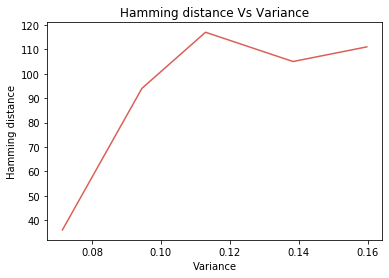

In [14]:
plt.title('Hamming distance Vs Variance')
plt.ylabel('Hamming distance')
plt.xlabel('Variance')
plt.plot(variance, hamming)

## QUESTION 3

### What happens to a NN that has been stored with natural images and has been presented with a slightly diverted image?

In [20]:
# define parameters, 100 cells network
nb_patterns_array = [4, 7, 10, 15, 20]
pattern_width = 28
pattern_height = 28
NO_OF_ITERATIONS = 25
N = pattern_width*pattern_height
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_BITS_TO_CHANGE = int(N/3)
random_pattern = 1

In [21]:
f = gzip.open('/home/noamtal/Desktop/BGU/4th_year/semsterB/IntroToNeuralNetworks/HopefieldAssignment/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 100

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

In [22]:
data_black = np.zeros((num_images, image_size, image_size, 1))
for i in range(len(data)):
    
    a = np.zeros(image_size*image_size)
    x = np.reshape(data[i], image_size*image_size)
    
    for j in range(len(x)):
        
        a[j] = np.where(x[j] > 0 , -1, 1)
        
    A = np.reshape(a, (image_size, image_size, 1))
    data_black[i] = A

In [23]:
from scipy import ndimage

In [24]:
PATH = '/home/noamtal/Desktop/BGU/4th_year/semsterB/IntroToNeuralNetworks/HopefieldAssignment/zero_diverted.png'

Number of patterns:  4


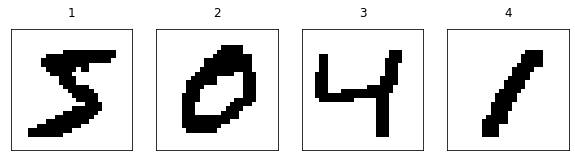

Pattern should converge to: pattern  2


100%|██████████| 25/25 [00:15<00:00,  1.59it/s]

Pattern converged to:  4


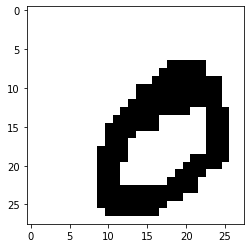

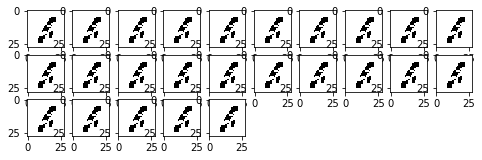

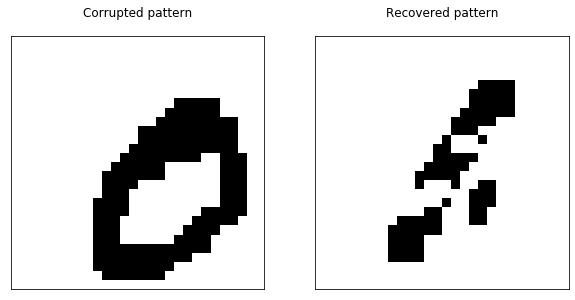

Number of patterns:  7


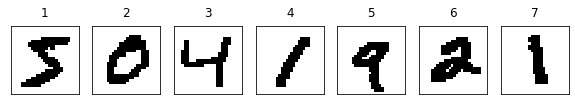

  0%|          | 3/784 [00:00<00:29, 26.85it/s]

Pattern should converge to: pattern  2


100%|██████████| 25/25 [00:15<00:00,  1.72it/s]

Pattern converged to:  4


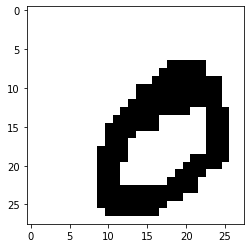

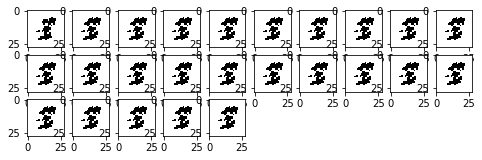

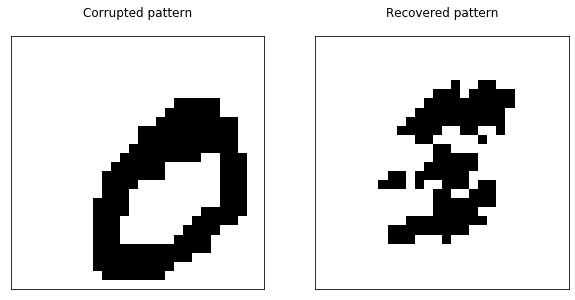

Number of patterns:  10


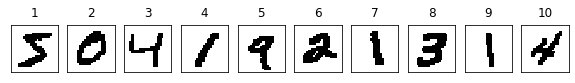

  0%|          | 3/784 [00:00<00:31, 24.74it/s]

Pattern should converge to: pattern  2


100%|██████████| 25/25 [00:15<00:00,  1.47it/s]


Pattern converged to:  9


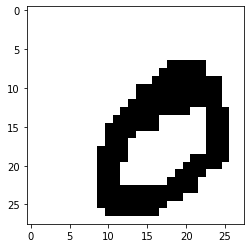

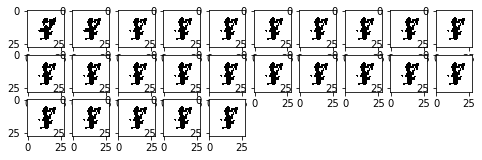

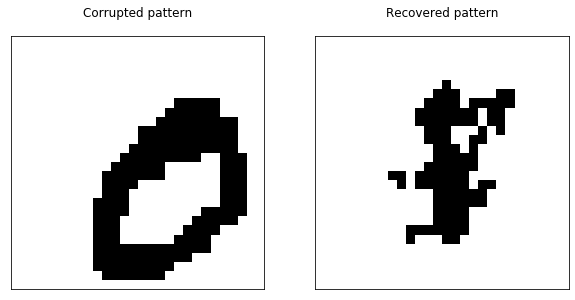

Number of patterns:  15


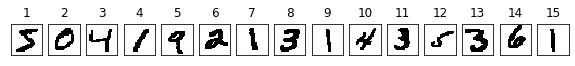

  0%|          | 2/784 [00:00<00:52, 14.93it/s]

Pattern should converge to: pattern  2


100%|██████████| 25/25 [00:15<00:00,  1.66it/s]

Pattern converged to:  9


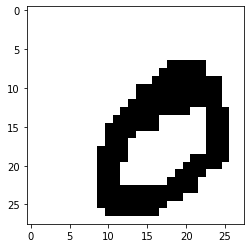

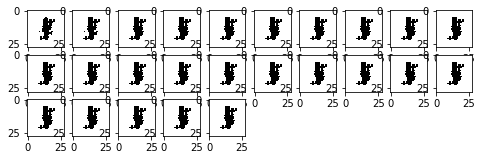

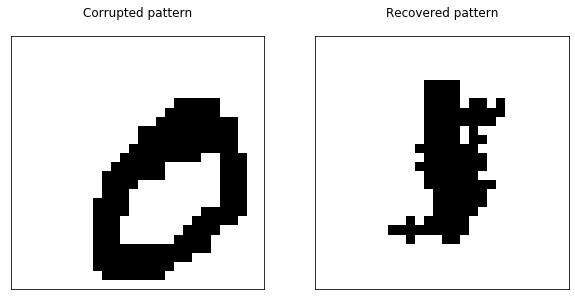

Number of patterns:  20


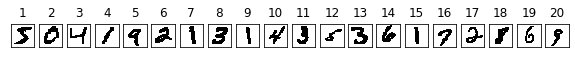

  0%|          | 0/784 [00:00<?, ?it/s]

Pattern should converge to: pattern  2


100%|██████████| 25/25 [00:15<00:00,  1.65it/s]

Pattern converged to:  20


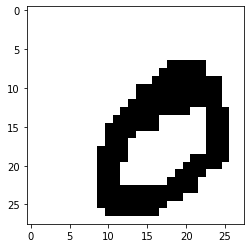

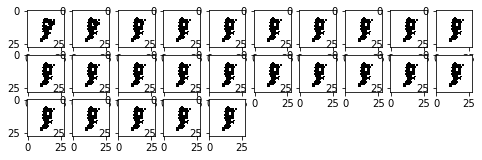

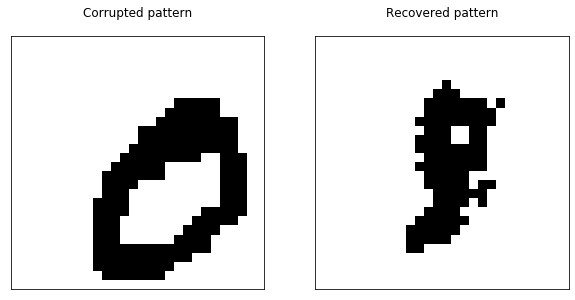

In [25]:
hamming = []
variance = []
for nb_patterns in range(len(nb_patterns_array)):
    
    nb_patterns = nb_patterns_array[nb_patterns]
    print('Number of patterns: ', nb_patterns)   
    
    #  create random patterns
    X = data_black[:nb_patterns]
    X = np.reshape(X, (nb_patterns, pattern_width*pattern_height))

    
    
    # the patterns to be learnd
    fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

    count = 0
    for i in range(nb_patterns):
        i == count
        ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(str(i+1))
        count += 1
    
    plt.show()
    
    
    
    # corrupt a pattern to be recover
    test_array = image_to_np(PATH)
    test_array_copy = test_array
    print('Pattern should converge to: pattern ', random_pattern+1)
    plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

    
    # calculating the weights matrix    
    w = weights(nb_patterns, X)
    
    
    #recover images
    h, hamming_distance, test_array = recover(nb_patterns, NO_OF_ITERATIONS, test_array, w, X)
    converged_pattern = np.argmin(hamming_distance[NO_OF_ITERATIONS-1])
    hamming.append(hamming_distance[NO_OF_ITERATIONS-1][0])
    variance.append(np.sqrt(nb_patterns/N))

    
    
    #show recovery results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].matshow(test_array_copy.reshape(pattern_height, pattern_width), cmap='gray')
    ax[0].set_title('Corrupted pattern')
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].matshow(test_array.reshape(pattern_height, pattern_width), cmap='gray')
    ax[1].set_title('Recovered pattern')
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

The model converges to a different pattern.

### How does the recovery quality depend on the size of the set?

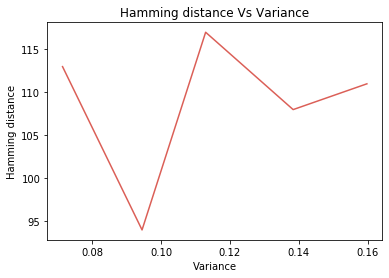

In [26]:
plt.title('Hamming distance Vs Variance')
plt.ylabel('Hamming distance')
plt.xlabel('Variance')
plt.plot(variance, hamming)

## QUESTION 4

### What happens when a set of figures written by one is given to the NN, then present a figure written by other? Can the NN recover the pattern to match the figure?

In [8]:
# define parameters, 100 cells network
nb_patterns = 6
pattern_width = 28
pattern_height = 28
NO_OF_ITERATIONS = 25
N = pattern_width*pattern_height
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_BITS_TO_CHANGE = int(N/3)
random_pattern = 1

In [9]:
f = gzip.open('/home/noamtal/Desktop/BGU/4th_year/semsterB/IntroToNeuralNetworks/HopefieldAssignment/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 100

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

In [10]:
a = np.zeros(image_size*image_size)
x = np.reshape(data[6], image_size*image_size)
y = np.reshape(data[3], image_size*image_size)
b = np.zeros(image_size*image_size)
    
for j in range(len(x)):
        
    a[j] = np.where(x[j] > 0 , -1, 1)
    b[j] = np.where(y[j] > 0 , -1, 1)
    
a = np.reshape(a, (image_size, image_size, 1))
b = np.reshape(b, (image_size, image_size, 1))

Text(0.5, 1.05, 'Stored pattern')

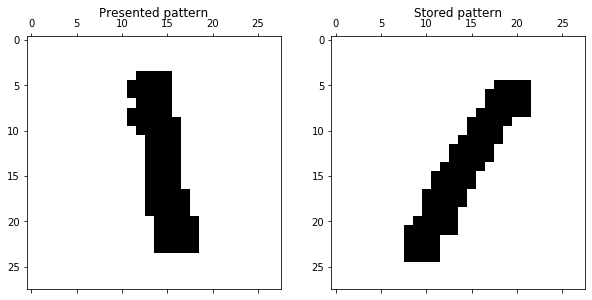

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].matshow(a.reshape(N_sqrt, N_sqrt), cmap='gray')
ax[0].set_title('Presented pattern')
ax[1].matshow(b.reshape(N_sqrt, N_sqrt), cmap='gray')
ax[1].set_title('Stored pattern')

In [12]:
data_black = np.zeros((num_images, image_size, image_size, 1))
for i in range(len(data)):
    
    a = np.zeros(image_size*image_size)
    x = np.reshape(data[i], image_size*image_size)
    
    for j in range(len(x)):
        
        a[j] = np.where(x[j] > 0 , -1, 1)
        
    A = np.reshape(a, (image_size, image_size, 1))
    data_black[i] = A

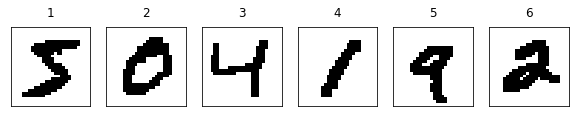

Pattern should converge to: pattern  4


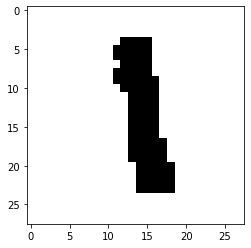

In [13]:
#  create random patterns
X = data_black[:nb_patterns]
X = np.reshape(X, (nb_patterns, pattern_width*pattern_height))
#test = np.reshape(test, ()
    
    
# the patterns to be learnd
fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

count = 0
for i in range(nb_patterns):
    i == count
    ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(str(i+1))
    count += 1
    
plt.show()

# pattern to be recover
a = np.zeros(image_size*image_size)
x = np.reshape(data[6], image_size*image_size)
    
for j in range(len(x)):
        
    a[j] = np.where(x[j] > 0 , -1, 1)
    
test_array = a
test_array_present = np.reshape(a, (image_size, image_size, 1))
test_array_copy = test_array
print('Pattern should converge to: pattern ', 4)
plt.imshow(test_array_present.reshape(N_sqrt, N_sqrt), cmap='gray')

100%|██████████| 25/25 [00:13<00:00,  1.90it/s]


Pattern converged to:  1


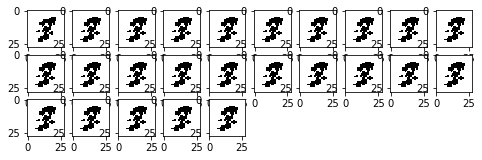

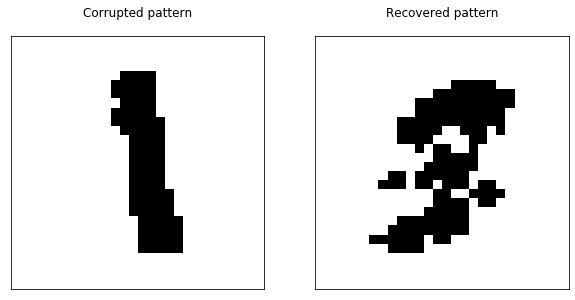

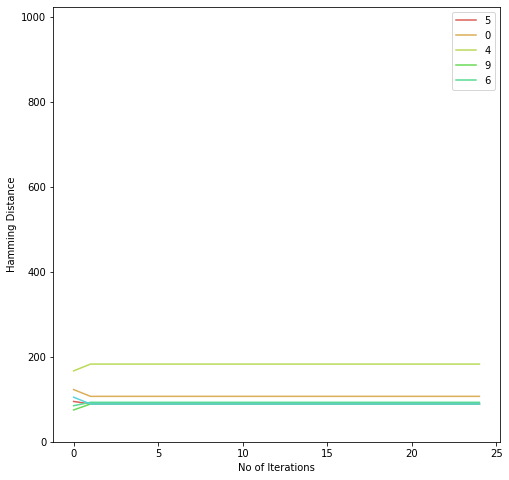

In [14]:
# calculating the weights matrix    
w = weights(nb_patterns, X)
    
    
#recover images
h, hamming_distance, test_array = recover(nb_patterns, NO_OF_ITERATIONS, test_array, w, X)

    
    
#show recovery results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].matshow(test_array_copy.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Corrupted pattern')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(test_array.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Recovered pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()


fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 1024])
plt.legend(['5', '0', '4', '9', '6'],  loc='best')
plt.show()

